# Лабораторная работа 5. Кластеризация и понижение размерности.

## Общая информация

Дата выдачи: 07.06.2016

Срок сдачи: 14.06.2016 23:59MSK


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках). Максимально допустимая оценка за работу — 10 баллов. Обратите внимание, что только за реализацию функций без подтверждения их корректной работы оценка выставляться не будет.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить задание на указанных в ответном письме условиях.

Задание выполняется САМОСТОЯТЕЛЬНО. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий в открытом источнике, необходимо прислать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Если вы будете решать задание на виртуальной машине, учтите, что его могут видеть все. К тому же недоступность виртуальной машины не является уважительной причиной для продления дедлайна.

### Формат сдачи
Для сдачи задания переименуйте получившийся файл *.ipynb в соответствии со следующим форматом: Username_(group)_Lab5.ipynb, где Username — ваша фамилия на латинице, group — название группы (например, Struminsky_IAD-20_Lab5.ipynb). Далее отправьте этот файл на используемую в Вашей группе почту курса (hse.minor.dm@gmail.com) c темой письма [ИАД-NN] - Лабораторная работа 5 - Фамилия Имя Отчество.

## Кластеризация  и понижение размерности

В этой части работы вы будете работать с уже известным вам набором данных изображений цифр, но в данном случае мы рассмотрим задачу кластеризации. Целью работы будет посмотреть можно ли разделить изображения цифр по классам,  не зная их истинных меток.

Для начала вам потребуется загрузить набор данных, используя функцию [load_digits](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html), в переменную data:

In [5]:
import sklearn.datasets
import numpy as np

data = sklearn.datasets.load_digits()

Сами изображения чисел в виде векторов хранятся в поле *data*, а истинные метки — в поле *target*. Сохраните изображения в переменную *X*, а истинные метки — *y*.

In [6]:
X = data.data
y = data.target

Задача кластеризации состоит в следующем: нужно построить разбиение всех объектов на *K* кластеров, где *K* задано заранее. В данном случае в датасете присутствуют цифры от 0 до 9, поэтому *K* будет равно 10.

Для того, чтобы в дальнейшем оценивать качество получившейся кластеризации, будем использовать следующие метрики:
 - [Homogenity](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html) — эта метрика основывается на использовании информации об истинных метках объектов. Она позволяет оценить, все ли объекты в кластере имеют одну и ту же метку. В качестве первого параметра ей передаются истинные метки класса, второй параметр — предсказанные. Обратите внимание, что данная метрика не является симметричной относительно аргументов. Данная метрика принимает значения от 0 до 1, где 1 соответствует наилучшей кластеризации.
 - [Silhouette Coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) — эта метрика, в отличии от предыдущей, оперирует только с исходной матрицей "объект-признак" и предсказанными метками. Она позволяет получить информацию насколько "хорошей" получилась кластеризация с точки зрения расположения объектов в кластере, оценивая насколько далеко они находятся друг от друга. Данная метрика принимает значения от -1 до 1, где 1 соответствует лучшей кластеризации, 0 говорит о том, что есть перекрывающиеся кластера.

**(1 балл)** Построение кластеризации будем производить с помощью метода [К-средних](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Для этого вам нужно сделать следующее:
 - создать объект *KMeans*, имеющий следующие интересные для нас параметры:
   - количество кластеров *n_clusters*
   - *random_state* — его следует зафиксировать для воспроизводимости результата
 - вызвать метод *fit_predict*, передав на вход переменную *X* и сохранив результаты в переменную *predicted_labels*

In [7]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters = 10, random_state=42)
predicted_labels = k_means.fit_predict(X)

**(2 балла)** Теперь вычислите значения указанных выше метрик для полученной кластеризации. Хорошее ли качество имеет данная кластеризация, исходя из интерпретации метрик?

In [8]:
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import silhouette_score

homogenity = sklearn.metrics.homogeneity_score(y, predicted_labels)
silhouette = sklearn.metrics.silhouette_score(X, predicted_labels)
homogenity, silhouette

(0.74146831194786966, 0.18240309354827947)

In [ ]:
# homogenity: 26% чисел попали в классы не с той меткой. 
# silhouette: близко к 0, что означает - класстеры перекрываются
# качество среднее

**(1 балл)** Добавьте к исходным данным один категориальный признак - метку кластера. Дает ли добавление метки кластера прирост качества при классификации логистической регрессией?

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7)
clf = LogisticRegression()
clf.fit(X_train, y_train)
print('без метки:', clf.score(X_test, y_test))

new_predicted_labels = predicted_labels[..., None] 
X_new = np.column_stack((X, new_predicted_labels))
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.7)
clf = LogisticRegression()
clf.fit(X_train, y_train)
print('с меткой:', clf.score(X_test, y_test))

без метки: 0.947535771065
с меткой: 0.935612082671


In [ ]:
# нет. результат, то лучше, то хуже. Но не на много.

**(1 балл)** Иногда полезно бывает посмотреть на результаты кластеризации. Поэтому воспользуемся методами уменьшения размерности, чтобы визуализировать результаты кластеризации. Для этих целей будем использовать два метода [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html), который основан на получении новых признаков с помощью линейной комбинации старых, а так же [tSNE](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html), который преобразует пространство более сложным образом, пытаясь оставить рядом объекты, которые были близки в исходном пространстве. Эти методы имеют схожий интерфейс, поэтому в обоих случаях последовательность дейтствий будет заключаться в следующем:
 - создать соответствующий объект, указав количество компонент *n_components* равным 2
 - вызвать метод *fit_transform*, передав переменную *X* и сохранив результат в переменные *X_pca* и *X_tsne* соответственно
 
Обратите внимание, что преобразование *tSNE* может вычисляться некоторое время (несколько минут). 

In [11]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

X_pca = PCA(n_components = 2).fit_transform(X)
X_tsne = TSNE(n_components = 2).fit_transform(X)

**(1 балл)** Теперь выполните 2 кластеризации, но в качестве матрицы "объекты-признаки" передавайте полученные ранее *X_pca* и *X_tsne*. Сохраните результаты предсказания в переменные *predicted_labels_pca* и *predicted_labels_tsne* соответственно. Посчитайте качество каждой кластеризации с помощью указанных ранее метрик качества.

In [19]:
predicted_labels_pca = k_means.fit_predict(X_pca)
print('pca:', homogeneity_score(y, predicted_labels_pca), silhouette_score(X_pca, predicted_labels_pca))
predicted_labels_tsne = k_means.fit_predict(X_tsne)
print('tsne:', homogeneity_score(y, predicted_labels_tsne), silhouette_score(X_tsne, predicted_labels_tsne))

pca: 0.524645710287 0.393250805882
tsne: 0.823312711597 0.50089605593


**(1 балл)** Сильно ли отличается качество новых кластеризаций от исходной для каждого способа сжатия размерности? Нашелся ли способ уменьшения размерности, который позволяет достичь наилучшего качества по обеим метрикам?

In [ ]:
# silhouette улучился в обоих случаях, но у pca уменьшилось homogeneity
# да, TSNE позволяет улучшить качество по обеим метрикам

С помощью функции *plot_embedding* ниже можно посмотреть на визуализацию кластеризации. На вход ей передается двумерная матрица "обекты-признаки", истинные метки и предсказанные метки. Она строит на плоскости объекты, при этом числом обозначена истинная метка объекта, а одинаковым цветом — объекты одного кластера.

In [13]:
def plot_embedding(X, y, predicted_labels, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(10, 10))
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(predicted_labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)
    plt.show()

**(1 балл)** Для каждой из матриц *X_pca* и *X_tsne* и результатов соответствующих кластеризаций (*predicted_labels_pca* и *predicted_labels_tsne*) вызовите функцию *plot_embedding*.

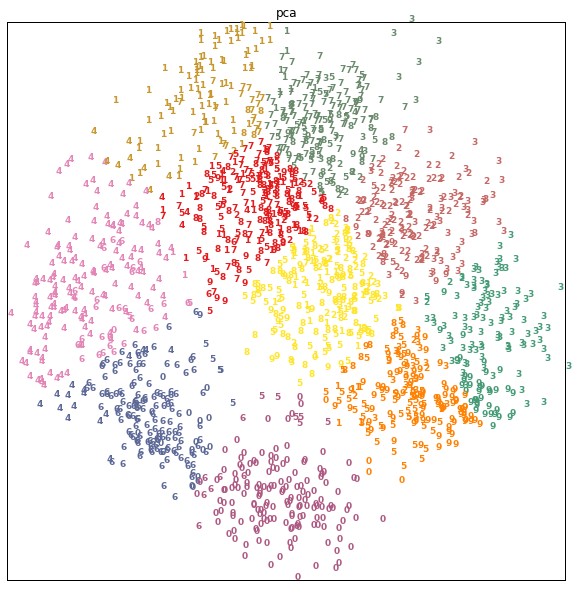

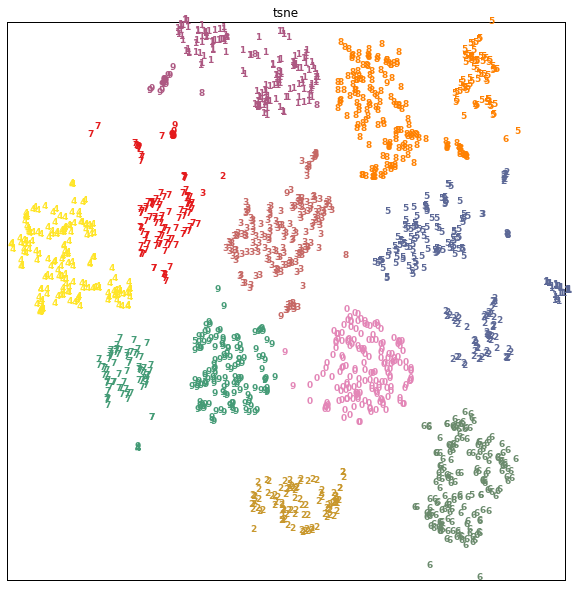

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

plot_embedding(X_pca, y, predicted_labels_pca, title='pca')
plot_embedding(X_tsne, y, predicted_labels_tsne, title='tsne')

**(2 балла)** Проанализируйте полученные результаты:
 - какой из трех методов кластеризации: на исходных признаках, на признаках, полученных с помощью PCA или tSNE дал наилучший результат по обеим метрикам?
 - какой из методов сжатия размерности дает наилучшую визуализацию на плоскости?
 - можно ли сказать, что результаты визуализации согласуются с метриками: если кластеры кажутся отделимыми визуально, то и значения метрик выше?
 - как вы думаете: если увеличить число кластеров (то есть взять не 10, а 12, 15 и пр.) может ли кластеризация быть более качественной? Почему?

In [ ]:
# 1) кластеризация tSNE
# 2) тоже tSNE. кластеры хорошо отделены друг от друга, почти все кластеры состоят из одной цифры
# 3) можно. у PCA homogeneity ниже, чем у tSNE: на рисунке видим, что у tSNE кластеры более однородные
# silhouette н PCA тожу ниже. На рисунках видим, что у PCA много перекрывающихся кластеров, в отличие от tSNE
# 4) Думаю, кластеры будут более однородными, но тогда для одной цифры у нас будет несколько класстеров,
# что плохо. Если увеличивать количество кластеров, то однородность внутри будет увеличиваться,
# но это приведет к переобучению